**TOPIC CHOSEN:** Recommender Systems-Movies         
**DATASET DETAILS:**                                         
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.   

**LINK:** https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?select=movie.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving link.csv to link (1).csv
Saving movie.csv to movie (1).csv
Saving rating.csv to rating (1).csv
Saving tag.csv to tag (1).csv


In [ ]:
movies = pd.read_csv("movie.csv")
tags = pd.read_csv("tag.csv")
ratings = pd.read_csv("rating.csv")
links = pd.read_csv("link.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
movies = pd.read_csv("movie.csv", index_col="movieId")
print(movies.shape)
movies.head()

(27278, 2)


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies["genres"] = movies["genres"].apply(lambda x : x.split("|"))
movies["genres"] = movies["genres"].apply(lambda x : ' '.join(word for word in x))
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
2,Jumanji (1995),Adventure Children Fantasy
3,Grumpier Old Men (1995),Comedy Romance
4,Waiting to Exhale (1995),Comedy Drama Romance
5,Father of the Bride Part II (1995),Comedy


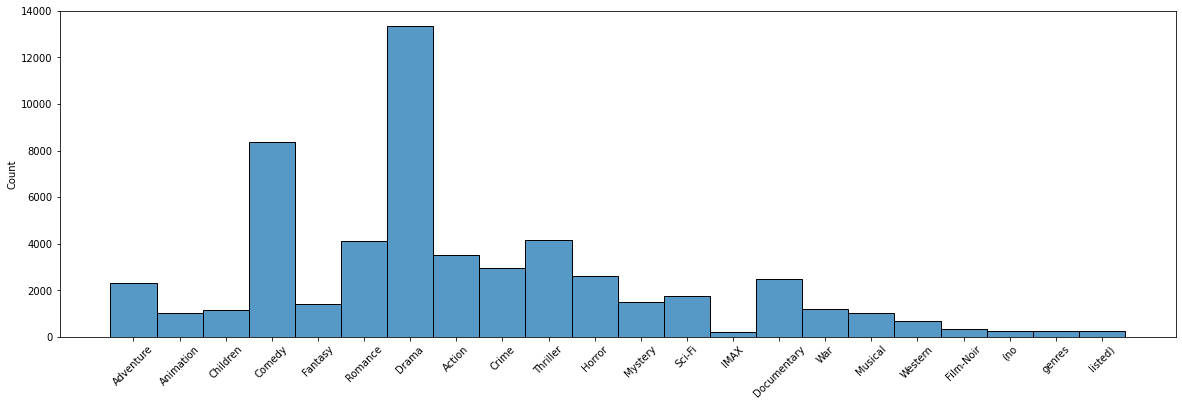

In [ ]:
all_genres = [genre for all_genre in movies.genres.to_numpy() for genre in all_genre.split(" ")]
plt.figure(figsize=(20, 6))
_ = sns.histplot(data=all_genres)
_ = plt.xticks(rotation=45)

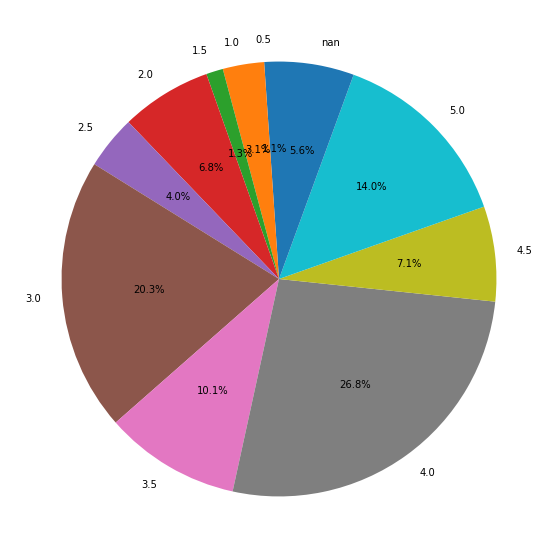

In [ ]:
all_rates, counts = np.unique(ratings.rating.to_numpy(), return_counts = True)
plt.figure(figsize=(10, 10))
_=plt.pie(counts, labels=all_rates, autopct='%1.1f%%', startangle=90)

# Content Based
recommend Movise Based on similare genres

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   27278 non-null  object
 1   genres  27278 non-null  object
dtypes: object(2)
memory usage: 639.3+ KB


In [ ]:
similarity_feature = movies["genres"].to_numpy()
similarity_feature = np.array([genre.lower() for genre in similarity_feature])
similarity_feature[0]

'adventure animation children comedy fantasy'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vecotr = CountVectorizer()
count_vecotr.fit(similarity_feature)
similarity_feature = count_vecotr.transform(similarity_feature)

# Using Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
movies_similarity = cosine_similarity(similarity_feature)
movies_similarity = pd.DataFrame(movies_similarity)
print(movies_similarity.shape)
movies_similarity.head()

(27278, 27278)


,0,1,2,3,4,5,6,7,8,9,...,27268,27269,27270,27271,27272,27273,27274,27275,27276,27277
0,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.316228,0.632456,1.000000,0.447214,0.316228,0.447214,0.447214,0.447214,0.0,0.516398
1,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.774597,0.000000,0.000000,0.000000,0.000000,0.577350,0.0,0.666667
2,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,1.000000,0.500000,0.316228,0.707107,0.500000,0.707107,0.707107,0.000000,0.0,0.000000
3,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,...,0.816497,0.408248,0.258199,0.577350,0.408248,0.577350,0.577350,0.000000,0.0,0.000000
4,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,0.707107,0.707107,0.447214,1.000000,0.707107,1.000000,1.000000,0.000000,0.0,0.000000


# Get Top 10 most similar movies

In [ ]:
def get_similar_movies_content(movie_name):
  movie_id = movies[movies.title == f"{movie_name}"].index[0]
  all_moveis = movies_similarity[movie_id - 1]

  k = 10
  idx = np.argpartition(all_moveis, -k)
  most_similar_movies_id = idx[-10:].values
  most_similar_movies_id = np.delete(most_similar_movies_id, np.where(most_similar_movies_id == movie_id - 1)[0])

  for movie_id in most_similar_movies_id :
    print(movies.iloc[movie_id].title)


In [ ]:
get_similar_movies_content("Toy Story (1995)")

Monsters, Inc. (2001)
Aladdin (1992)
The Magic Crystal (2011)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Toy Story Toons: Hawaiian Vacation (2011)
Antz (1998)
Boxtrolls, The (2014)
Turbo (2013)


# Collaborative filtering recommender systems

In [ ]:
print(ratings.shape)
ratings.head()

(699528, 4)


,userId,movieId,rating,timestamp
0,1.0,2.0,3.5,02-04-2005 23:53
1,1.0,29.0,3.5,02-04-2005 23:31
2,1.0,32.0,3.5,02-04-2005 23:33
3,1.0,47.0,3.5,02-04-2005 23:32
4,1.0,50.0,3.5,02-04-2005 23:29


# Number of Votes for each User

In [ ]:
user_vote = pd.DataFrame(ratings.groupby("userId")["rating"].agg("count"))
top_users_index = user_vote.rating.sort_values(ascending=False)[:20].index
top_users_value = user_vote.rating.sort_values(ascending=False)[:20].values
plt.figure(figsize=(22, 8))
_ = sns.barplot(x=top_users_index, y=top_users_value)

KeyError: ignored

In [ ]:
user_vote.describe()

,rating
count,4475.000000
mean,147.604022
std,222.389126
min,20.000000
25%,35.000000
50%,69.000000
75%,160.000000
max,2711.000000


# Number of Votes for each movie

In [ ]:
def get_movie_name(movie_id):
  return movies.iloc[movie_id].title

In [ ]:
movies_votes = pd.DataFrame(ratings.groupby("movieId")["rating"].agg("count"))
top_movies_index = movies_votes.rating.sort_values(ascending=False)[:20].index
top_movies_value = movies_votes.rating.sort_values(ascending=False)[:20].values
movie_names = [get_movie_name(id) for id in top_movies_index]
plt.figure(figsize=(22, 8))
_ = sns.barplot(x=top_movies_index, y=top_movies_value)
print(movie_names)

TypeError: ignored

In [ ]:
movies_votes.describe()

,rating
count,12749.000000
mean,51.810181
std,143.662251
min,1.000000
25%,2.000000
50%,7.000000
75%,32.000000
max,2192.000000


# Putting users and movie in one pivot table for collaborative filtering

In [ ]:
data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings, values ='rating')
print(data.shape)
data.head()

ValueError: ignored

# Data Cleaning

### Getting rid of movies with less than Ten(10) Votes

In [ ]:
data = data.dropna(thresh=10)
print(data.shape)
data.head()

NameError: ignored

### Getting rid of users with less than hundred and seventy(170) Votes

In [ ]:
data = data.dropna(axis = 1, thresh=170)
print(data.shape)
data.head()

NameError: ignored

### Filling NaN Values

In [ ]:
data = data.fillna(0)
data.head()

userId,1,4,6,18,19,20,21,28,41,42,...,590,596,597,599,600,603,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,3.5,4.0,0.0,3.5,0.0,0.0,0.0,...,4.0,4.0,4.0,3.0,2.5,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,...,2.5,0.0,0.0,2.5,4.0,0.0,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,...,3.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,4.0,0.0,0.0,0.0,3.5,0.0,0.0,...,3.5,0.0,3.0,4.5,0.0,4.0,0.0,0.0,0.0,5.0


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=21)
knn.fit(data)

def get_similar_movies_collaborative(movie_name): 
    movie_id = movies[movies.title == f"{movie_name}"].index[0]
    print("movie id is : ", movie_id)
    movie_vote_data = data.loc[movie_id].to_numpy()
    movie_vote_data = movie_vote_data.reshape(1, -1)
    distances , indices = knn.kneighbors(movie_vote_data
                                     ,n_neighbors=11)
    names = [get_movie_name(id) for id in indices]
    names = names[0].values.reshape(1, 11)
    for val in list(zip(distances[0], names[0])):
      print(val)

In [ ]:
get_similar_movies_collaborative("Father of the Bride Part II (1995)")

movie id is :  5
(0.0, 'Waiting to Exhale (1995)')
(0.4846989472666, 'Heat (1995)')
(0.48885350708509423, 'Rob Roy (1995)')
(0.49550157203530454, 'In the Line of Fire (1993)')
(0.49714024862527395, 'First Knight (1995)')
(0.4985338619397275, 'Tommy Boy (1995)')
(0.49962304339820274, 'Natural Born Killers (1994)')
(0.5009123008154115, 'Walking and Talking (1996)')
(0.5011436019417744, 'Sunset Park (1996)')
(0.5069361302561624, 'Boys Life (1995)')
(0.508329167728474, 'Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)')
